<a href="https://colab.research.google.com/github/cabamarcos/TAA_3/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

Grupo: Ismael García Mayorga, Marcos Caballero Cortés i Roger Juvé Vallès

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

Nuestro objetivo para esta tarea es resolver un problema de clasificación, más específicamente, clasificar mensajes como mensajes de odio o no odio. Para lograr nuestro objetivo hemos usado un dataset que contiene las frases que ya analizadas y que vamos a clasificar. En este dataset se realiza una extracción de las caracteristicas de las palabras. Estas características extraídas serán las utilizadas para entrenar nuestro modelo. Se realizará un análisis para comprender como cada una de estas variables nos puede ayudar a entrenar nuestro modelo y como están distribuidas.

In [ ]:
# Cargamos el dataset
df = pd.read_csv("out.csv")

# Mostramos el número de filas
print("Número de filas:", len(df))

Número de filas:  10000


In [ ]:
df.head(10)

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,...,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,...,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,...,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,...,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,...,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244
5,0,3,1,0,0,"llegadar,vacación,ser,sinonimo,dejadez,olvidar...",0.0,-0.287998,-0.240723,-0.164022,...,0.069328,0.047238,0.119973,0.152955,0.039484,0.100280,0.127848,0.068328,0.087112,0.221244
6,7,50,6,0,0,"hacer,año,demandar,cirugia,estetico,masculino,...",0.0,7.198852,2.071037,1.096297,...,14.909091,7.892080,-2.998878,-3.823302,2.270472,-0.862747,-1.099926,-0.456692,-0.582242,0.221244
7,0,40,5,0,0,"tono,ligeramente,bronceado,piel,aspecto,mas,at...",0.0,-0.287998,1.579174,0.844233,...,-0.454799,-0.243137,0.119973,0.152955,1.333191,-0.657848,-0.838697,-0.351688,-0.448371,0.221244
8,4,17,1,0,0,"tradicionalmente,mundo,cosmetico,dirigido,muje...",0.0,3.990202,0.447887,-0.164022,...,1.787158,-0.654482,-1.662227,-2.119191,-0.073463,-0.186579,-0.237872,0.068328,0.087112,0.221244
9,2,64,12,0,0,"edad,cronologico,aparecer,dni,ser,mismo,edad,b...",0.0,1.851102,2.759647,2.608680,...,5.108388,4.828933,-0.771127,-0.983118,7.199037,-1.149606,-1.465645,-1.086717,-1.385467,0.221244


In [ ]:
# Hacemos un recuento de la cantidad de valores nulos en el dataset
df.isnull().sum()

,0
A,0
B,0
C,0
D,0
E,0
comentario,0
label,0
A_t,0
B_t,0
C_t,0


In [ ]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates(subset=['comentario'], keep='first')
print(f"Filas sin duplicados: {len(df)}")

Filas sin duplicados: 9461


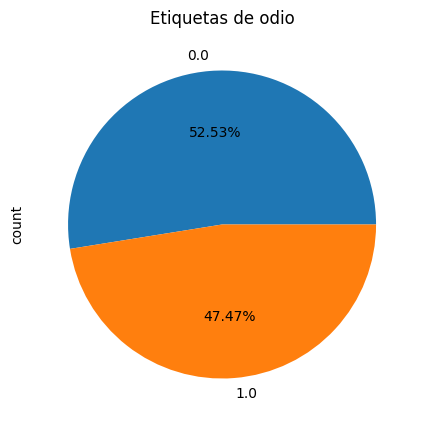

In [ ]:
# Hacemos un recuento de las instancias de cada clase
df['label'].value_counts().plot(kind='pie', title="Etiquetas de odio", autopct='%1.2f%%', figsize=(5,5))
plt.show()

**BALANCEO Y LIMPIEZA DEL DATASET**

Como vemos en la tabla superior no existen valores nulos en el dataset en ninguna de las columnas. Pero sí que hemos encontrado que hay instancias duplicadas así que realizamos una limpieza de estos valores. También podemos observar en el gráfico anterior que tenemos un dataset bastante balanceado, por lo que no será necesario ningún tipo de intervención adicional.

**VALORES ATÍPICOS**

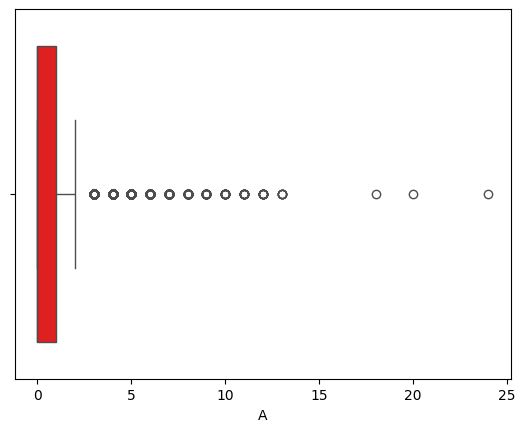

Número de valores atípicos: 1220


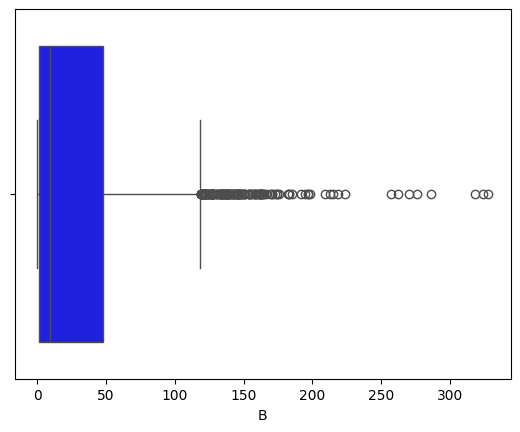

Número de valores atípicos: 163


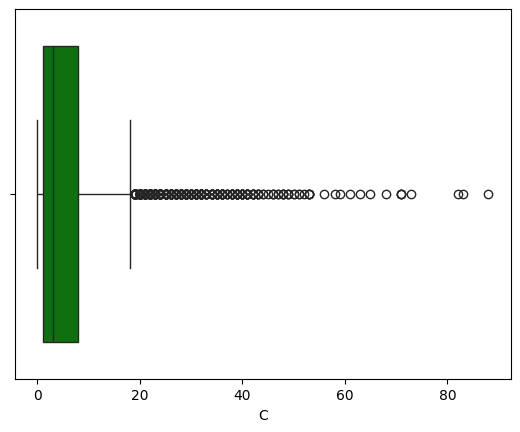

Número de valores atípicos: 597


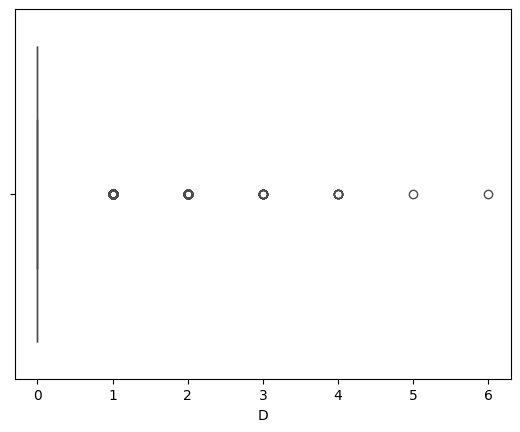

Número de valores atípicos: 753


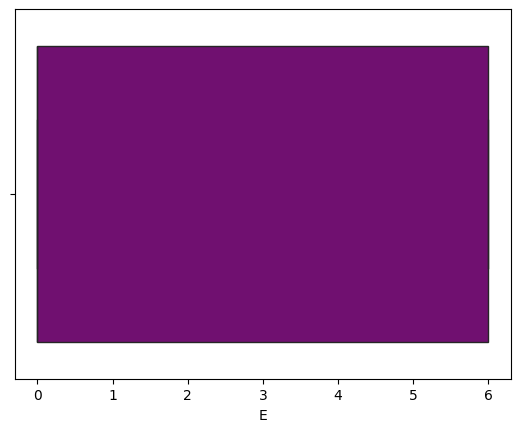

Número de valores atípicos: 0


In [ ]:
import seaborn as sns

"Realizaremos la representación del diagrama de cajas para obtener aquellos valores anómalos (outliers)"

lista = ['A', 'B', 'C', 'D', 'E']
colores = ['red', 'blue', 'green', 'orange', 'purple']

for i,c in zip(lista,colores):
    plt.figure()
    ay= sns.boxplot(data=df, x=i,color=c)
    plt.show()

    #Calculamos los cuartiles Q1 y Q3
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #Realizamos un filtrado, donde los valores que superen los límites serán considerados atípicos
    valores_atipicos = df[(df[i] < limite_inferior) | (df[i] > limite_superior)]

    # Obtener el número de valores atípicos
    numero_valores_atipicos = len(valores_atipicos)


    print("Número de valores atípicos:", numero_valores_atipicos)



Para calcular el número de valores atípicos nos hemos basado en el uso de diagramas de cajas, donde los valores atípicos son representados como circulos que superan los bigotes tanto superiores y inferiores del diagrama. En este caso no podemos afirmar que estos valores sean debidos a errores de medición, ya que muchos de ellos pueden representar frases más largas que la media, sino a que se trata de una distribución de cola larga.

**ESTUDIO DE LA RELACIÓN ENTRE VARIABLES**

In [ ]:
from scipy.stats import chi2_contingency

# Seleccionamos las variabels independientes

variables_independientes = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t']

for variable in variables_independientes:
    # Las variables deben ser convertidas a categoricas discreta para el conteo de la frecuencia, elemento fundamental en el test chi2
    df[f"{variable}_binned"] = pd.cut(df[variable], bins=5, labels=False)

    # Creacion de tabla de contingencia, esta tabla muestra la frecuencia con la que ocurren las combinaciones de categorías entre ambas variables
    contingency_table = pd.crosstab(df[f"{variable}_binned"], df['label'])

    # Prueba de Chi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{variable}: Chi²= {chi2:.3f}")

A_t: Chi²= 426.460
B_t: Chi²= 1478.348
C_t: Chi²= 645.906
D_t: Chi²= 60.830
E_t: Chi²= 5309.415


In [ ]:
from scipy.stats import chi2_contingency

# Seleccionamos las variabels independientes

variables_independientes = ['Valor_1',	'Valor_2', 'Valor_3', 'Valor_4', 'Valor_5',	'Valor_6', 'Valor_7', 'Valor_8', 'Valor_9', 'Valor_10']

for variable in variables_independientes:
    # Las variables deben ser convertidas a categoricas discreta para el conteo de la frecuencia, elemento fundamental en el test chi2
    df[f"{variable}_binned"] = pd.cut(df[variable], bins=5, labels=False)

    # Creacion de tabla de contingencia, esta tabla muestra la frecuencia con la que ocurren las combinaciones de categorías entre ambas variables
    contingency_table = pd.crosstab(df[f"{variable}_binned"], df['label'])

    # Prueba de Chi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{variable}: Chi²= {chi2:.3f}")

Valor_1: Chi²= 29.014
Valor_2: Chi²= 89.482
Valor_3: Chi²= 82.886
Valor_4: Chi²= 172.826
Valor_5: Chi²= 38.121
Valor_6: Chi²= 1217.510
Valor_7: Chi²= 191.218
Valor_8: Chi²= 652.687
Valor_9: Chi²= 106.413
Valor_10: Chi²= 397.764


Se ha reliazado una prueba de chi2, esta prueba nos indicará la relación que tienen nuestras variables independientes con la variable objetivo. Las variables con valores más grandes representarán las que tienen una relación más fuerte. Se han raelizado dos estudios:

El primero comprueba la relación que tienen nuestras variables independientes cuando se ha estandarizado sus valores, estas variables son A_t, B_t, C_t, D_t y E_t. Las variables que mayor relación tienen son: B_t y E_t.

El segundo estudio se ha realizazado con las variables independientes cuando se ha multiplicado el valor estandarizado por parejas de dos respectivamente. En este caso las variables con mayor importancia son: Valor_6 y Valor_8.

## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

**DISTRIBUCIÓN DATOS**

In [ ]:
from sklearn.model_selection import train_test_split

# Quitamos las filas que no usaremos para el entrenamiento
df_entrenamiento = df.drop(columns=['A', 'B', 'C', 'D', 'E', 'comentario'])

# Guardamos el csv de nuestro dataset de entrenamiento
df_entrenamiento.to_csv("out2.csv", index=False)

# Separamos las variables en features y variable objetivo
X = df_entrenamiento.drop(['label'],axis=1)
Y = df_entrenamiento['label']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Creamos el clasificador Naïve Bayes
nb_classifier = GaussianNB()

# Entrenamos el modelo
nb_classifier.fit(X_train, y_train)

GaussianNB()

**UTILIDAD DEL MODELO**

Naïve Bayes es un algoritmo que es utilizado normalmente para la clasificación de textos. Por ejemplo es utilizado para el filtrado de spam, análisis de sentimientos y la clasificación de noticias.

La razón principal por la que funciona bien en estos casos es que los textos tienen múltiples características (palabras), y aunque la suposición de independencia entre ellas no sea del todo cierta, sigue dando buenos resultados en la práctica.

Además contiene ventajas como que es muy rápido y eficiente, funciona bien con pocas muestras y maneja bien las palabras irrelevantes gracias a la probabilidad condicional.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Parámetros con los que probaremos el modelo Random Forest
n_arboles = [5, 10, 20, 50, 100]
particion = "gini"
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

# Creamos los diferentes modelos de Random Forest
randomForest = [RandomForestClassifier(n_estimators = i, criterion = particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features = None) for i in n_arboles]

print(randomForest)


In [ ]:
# Entrenamos los modelos
rf_fit = [modelo_rf.fit(X_train,y_train) for modelo_rf in randomForest]

**UTILIDAD DEL MODELO**

Randon forest es un modelo de aprendizaje automático combina la simplicidad de los árboles de decisión y la robustez de combinar múltiples árboles con el método Baggibg. Este nos será útil para la tarea de clasificación de mensajes de odio que nos requiere este problema. Gracias al uso de arboles de decisión este modelo es capaz de modelar ralaciones no lineales entre nuestros datos. Otra gran ventaja de este modelo es que puede tratar datasets desbalanceados o con ruido de manera bastante eficiente, en nuestro caso tenemos un dataset limpio, con apenas ruido y bien balanceado, sin embargo, para usos futuros donde querramos trabajar con diferentes datasets es una opción bastante acertada. Debido a su capacidad de aleatorización en la creación de árboles, hace que nuestro modelo tenga una gran capacidad de generalización consiguiendo así que no ocurra overfitting.

### SVM

In [ ]:
from sklearn.svm import SVC

# Parámetros con los que probamos el modelo SVC
C = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'
gamma = 'scale'

# Creamos los diferentes modelos SVC
svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
y_predictions_SVC_train = []
y_predictions_SVC_test = []
y_predictions_SVC_test_best = []

print(svc)

[SVC(C=0.1), SVC(C=1), SVC(C=10), SVC(C=100), SVC(C=1000)]


In [ ]:
# Entrenamos los modelos
for i in range(len(svc)):
    svc[i].fit(X_train, y_train)

**UTILIDAD DEL MODELO**

Hemos elegido usar una SVM dado su uso frecuente en la tarea de clasificación de textos y así comprobar su utilidad. Este modelo construirá un hiperplano en el feature space de las variables independientes para separar dos espacios geométricos que corresponderán a mensajes de odio o no odio. En nuestro caso como nos hemos quedado con 15 variables será un espacio con suficiente dimensionalidad para que los datos sean separables por un hiperplano. Aún así usamos un truco kernel para asegurarnos de ello y maximizar el margen.

Estos modelos suelen ser computacionalmente costosos, pero como en nuestro caso tenemos un dataset relativamente pequeño y hemos delimitado a unas variables las entradas del modelo aligeraremos esa carga. También facilita el entrenamiento el hecho de que las variables A, B, C, D y E estén estandárizadas ya que SVM depende de la escala de los datos para separar-los.

## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

### Bayes

In [ ]:
# Hacer predicciones
y_pred = nb_classifier.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.89


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88       984
         1.0       0.81      1.00      0.90       909

    accuracy                           0.89      1893
   macro avg       0.90      0.89      0.89      1893
weighted avg       0.91      0.89      0.89      1893



In [ ]:
X_pred = nb_classifier.predict(X_train)

accuracy = accuracy_score(y_train, X_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.89


In [ ]:
print(classification_report(y_train, X_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      3986
         1.0       0.81      0.99      0.89      3582

    accuracy                           0.89      7568
   macro avg       0.90      0.89      0.89      7568
weighted avg       0.91      0.89      0.89      7568



**Resultado**

Como podemos ver, hemos conseguido un porcentaje de acierto del 89%, lo cual es un porcentaje bastante alto. Un aspecto positivo es que no hay sobre aprendizaje. Si comparas los resultados con los otros modelos, podemos ver que no son tan buenos como los demás.

### Random Forest

In [ ]:
print('Acurracy con los datos de entrenamiento')
for modelo, arboles in zip(rf_fit, n_arboles):
    print(f"Modelo con número de árboles={arboles}: {modelo.score(X_train, y_train)}")

Acurracy con los datos de entrenamiento
Modelo con número de árboles=5: 0.983747357293869
Modelo con número de árboles=10: 0.9841437632135307
Modelo con número de árboles=20: 0.9842758985200846
Modelo con número de árboles=50: 0.9842758985200846
Modelo con número de árboles=100: 0.9842758985200846


In [ ]:
print('Acurracy con los datos de test')
for modelo, arboles in zip(rf_fit, n_arboles):
    print(f"Modelo con número de árboles={arboles}: {modelo.score(X_test, y_test)}")

Acurracy con los datos de entrenamiento
Modelo con número de árboles=5: 0.9741151611199155
Modelo con número de árboles=10: 0.9756999471737982
Modelo con número de árboles=20: 0.9756999471737982
Modelo con número de árboles=50: 0.9762282091917591
Modelo con número de árboles=100: 0.9756999471737982


In [ ]:
from sklearn.metrics import classification_report

for modelo_rf, arboles in zip(rf_fit, n_arboles):
    Y_pred = modelo_rf.predict(X_train)
    print(f"Modelo con un nímero de árboles ={arboles}:")
    print(classification_report(y_train, Y_pred))
    print("\n")

Modelo con un nímero de árboles =5:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg       0.98      0.98      0.98      7568
weighted avg       0.98      0.98      0.98      7568



Modelo con un nímero de árboles =10:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg       0.98      0.98      0.98      7568
weighted avg       0.98      0.98      0.98      7568



Modelo con un nímero de árboles =20:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg  

In [ ]:
for modelo_rf, arboles in zip(rf_fit, n_arboles):
    Y_pred = modelo_rf.predict(X_test)
    print(f"Modelo con un nímero de árboles ={arboles}:")
    print(classification_report(y_test, Y_pred))
    print("\n")

Modelo con un nímero de árboles =5:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       984
         1.0       0.97      0.97      0.97       909

    accuracy                           0.97      1893
   macro avg       0.97      0.97      0.97      1893
weighted avg       0.97      0.97      0.97      1893



Modelo con un nímero de árboles =10:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       984
         1.0       0.98      0.97      0.97       909

    accuracy                           0.98      1893
   macro avg       0.98      0.98      0.98      1893
weighted avg       0.98      0.98      0.98      1893



Modelo con un nímero de árboles =20:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       984
         1.0       0.97      0.97      0.97       909

    accuracy                           0.98      1893
   macro avg  

**RESULTADO**

De forma general los resultados obtenidos han sido bastante buenos tanto en los datos de entrenamiento como para los de test, siendo esto una clara muestra de que nuestro modelo no tiene overfitting. Por otro lado, si observamos métricas como precisión o recall también se han obtenido valores muy buenos, que pueden ser traducidos como que nuestro modelo genera pocos falsos positivos y falsos negativos. El rendiemineto obtenido para ambas clases es muy parecido y no se observa ninguna clase con un rendimineto superior. Respecto al número de árboles, se puede afirmar que aumentar el número de estos no proporciona ninguna ventaja, lo único que provocaría sería un coste computacional mayor.

### SVM

In [ ]:
for i in range(len(svc)):
    y_predictions_SVC_train.append(svc[i].predict(X_train))
    y_predictions_SVC_test.append(svc[i].predict(X_test))

    print(f"Precisión del modelo SVC en el dataset de entrenamiento (C={C[i]}): {svc[i].score(X_train, y_train):.3f}")

    print(f"Precisión del modelo SVC en el dataset de test (C={C[i]}): {svc[i].score(X_test, y_test):.3f}")

    print()

Precisión del modelo SVC en el dataset de entrenamiento (C=0.1): 0.944
Precisión del modelo SVC en el dataset de test (C=0.1): 0.945

Precisión del modelo SVC en el dataset de entrenamiento (C=1): 0.956
Precisión del modelo SVC en el dataset de test (C=1): 0.958

Precisión del modelo SVC en el dataset de entrenamiento (C=10): 0.972
Precisión del modelo SVC en el dataset de test (C=10): 0.974

Precisión del modelo SVC en el dataset de entrenamiento (C=100): 0.976
Precisión del modelo SVC en el dataset de test (C=100): 0.975

Precisión del modelo SVC en el dataset de entrenamiento (C=1000): 0.976
Precisión del modelo SVC en el dataset de test (C=1000): 0.974



In [ ]:
print("")
for i in range(len(svc)):
    print(f"Reporte de clasificación del modelo SVC (C={C[i]}):")
    print(classification_report(y_train, y_predictions_SVC_train[i]))
    print()

Reporte de clasificación del modelo SVC (C=0.1):
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3986
         1.0       0.90      0.99      0.94      3582

    accuracy                           0.94      7568
   macro avg       0.95      0.95      0.94      7568
weighted avg       0.95      0.94      0.94      7568


Reporte de clasificación del modelo SVC (C=1):
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      3986
         1.0       0.92      1.00      0.96      3582

    accuracy                           0.96      7568
   macro avg       0.96      0.96      0.96      7568
weighted avg       0.96      0.96      0.96      7568


Reporte de clasificación del modelo SVC (C=10):
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      3986
         1.0       0.95      1.00      0.97      3582

    accuracy                        

In [ ]:
for i in range(len(svc)):
    print(f"Reporte de clasificación del modelo SVC (C={C[i]}):")
    print(classification_report(y_test, y_predictions_SVC_test[i]))
    print()

Reporte de clasificación del modelo SVC (C=0.1):
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94       984
         1.0       0.90      1.00      0.95       909

    accuracy                           0.94      1893
   macro avg       0.95      0.95      0.94      1893
weighted avg       0.95      0.94      0.94      1893


Reporte de clasificación del modelo SVC (C=1):
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       984
         1.0       0.92      1.00      0.96       909

    accuracy                           0.96      1893
   macro avg       0.96      0.96      0.96      1893
weighted avg       0.96      0.96      0.96      1893


Reporte de clasificación del modelo SVC (C=10):
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       984
         1.0       0.95      0.99      0.97       909

    accuracy                        

**RESULTADOS**

Como vemos en los resultados de precisión, no existe overfitting en nuestro modelo ya que la precisión en los datos de entrenamiento y test es casi idéntica.

En los diferentes modelos que hemos entrenado con valores de C diferentes tienen todos una precisión muy alta, lo que indica que los datos son fácilmente separables en nuestro feature space. Aún así apreciamos que con los valores de C más altos ganamos un pequeño porcentaje más de precisión. Con este parámetro indicamos al modelo que queremos maximizar el margen que separa los datos de ambas clases y es este hecho el que nos da esta ganancia en la precisión.